In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
edu = pd.read_csv('files/ch02/educ_figdp_1_Data.csv', na_values = ':', usecols = ["TIME","GEO","Value"]) 
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91
7,2007,European Union (28 countries),4.92
8,2008,European Union (28 countries),5.04
9,2009,European Union (28 countries),5.38


In [4]:
edu[10:14]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


In [8]:
edu[edu['Value'].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


In [17]:
edu['GEO'].apply(lambda d: d.upper())

0      EUROPEAN UNION (28 COUNTRIES)
1      EUROPEAN UNION (28 COUNTRIES)
2      EUROPEAN UNION (28 COUNTRIES)
3      EUROPEAN UNION (28 COUNTRIES)
4      EUROPEAN UNION (28 COUNTRIES)
5      EUROPEAN UNION (28 COUNTRIES)
6      EUROPEAN UNION (28 COUNTRIES)
7      EUROPEAN UNION (28 COUNTRIES)
8      EUROPEAN UNION (28 COUNTRIES)
9      EUROPEAN UNION (28 COUNTRIES)
10     EUROPEAN UNION (28 COUNTRIES)
11     EUROPEAN UNION (28 COUNTRIES)
12     EUROPEAN UNION (27 COUNTRIES)
13     EUROPEAN UNION (27 COUNTRIES)
14     EUROPEAN UNION (27 COUNTRIES)
15     EUROPEAN UNION (27 COUNTRIES)
16     EUROPEAN UNION (27 COUNTRIES)
17     EUROPEAN UNION (27 COUNTRIES)
18     EUROPEAN UNION (27 COUNTRIES)
19     EUROPEAN UNION (27 COUNTRIES)
20     EUROPEAN UNION (27 COUNTRIES)
21     EUROPEAN UNION (27 COUNTRIES)
22     EUROPEAN UNION (27 COUNTRIES)
23     EUROPEAN UNION (27 COUNTRIES)
24     EUROPEAN UNION (25 COUNTRIES)
25     EUROPEAN UNION (25 COUNTRIES)
26     EUROPEAN UNION (25 COUNTRIES)
2

In [8]:
filtered_data = edu[edu['TIME'] > 2005]
pivedu = pd.pivot_table(filtered_data, 
                       values='Value',
                       index=['GEO'],
                       columns=['TIME'])
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [15]:
pivedu = pivedu.drop(['Euro area (13 countries)',
'Euro area (15 countries)',
'Euro area (17 countries)',
'Euro area (18 countries)',
'European Union (25 countries)',
'European Union (27 countries)',
'European Union (28 countries)'
],
axis = 0)
pivedu = pivedu.rename(index = {'Germany (until 1990 former territory of the FRG)': 'Germany'})
pivedu = pivedu.dropna ()

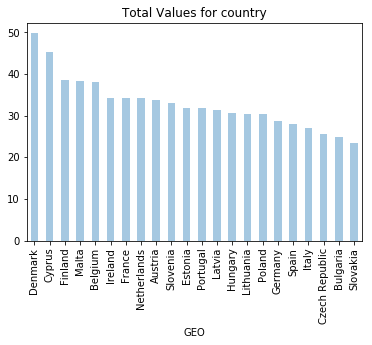

In [21]:
totalSum = pivedu.sum(axis=1).sort_values(ascending= False)
totalSum.plot(kind='bar', style='b', alpha=0.4, title='Total Values for country')

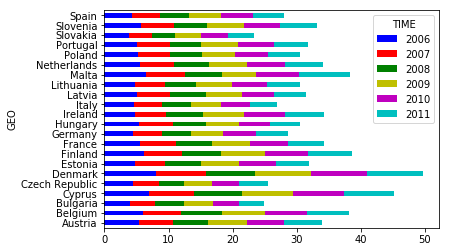

In [25]:
my_colors = ['b','r','g','y','m','c']
ax = pivedu.plot(kind='barh',
                stacked = True,
                color = my_colors)
